# Question Generation

In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer, TFT5ForConditionalGeneration
import tensorflow as tf
import numpy as np
import pandas as pd

squad_v2_data = load_dataset("squad_v2")
train_set = squad_v2_data["train"]
val_set = squad_v2_data["validation"]

2023-12-01 14:21:01.189773: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 14:21:01.189807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 14:21:01.189843: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 14:21:01.197168: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.DataFrame(train_set)

<Axes: >

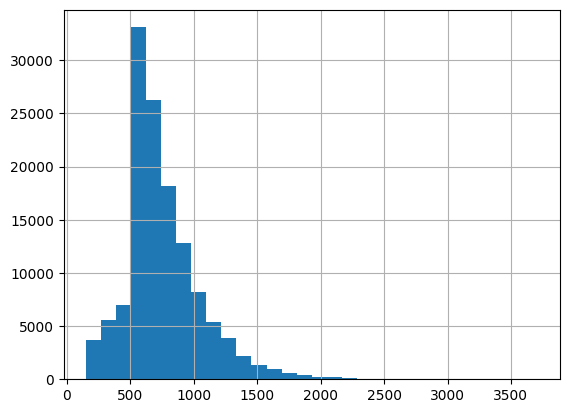

In [8]:
import matplotlib.pyplot as plt
df["context"].str.len().hist(bins=30)

In [2]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = TFT5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

2023-11-30 16:51:35.439987: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 16:51:35.461857: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 16:51:35.462084: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
# First, take a test context for which we will consider one answerable question, and one unanswerable question.
test_context = train_set["context"][2075]
print(len(test_context))
test_context

705


'The Legend of Zelda: Twilight Princess (Japanese: ゼルダの伝説 トワイライトプリンセス, Hepburn: Zeruda no Densetsu: Towairaito Purinsesu?) is an action-adventure game developed and published by Nintendo for the GameCube and Wii home video game consoles. It is the thirteenth installment in the The Legend of Zelda series. Originally planned for release on the GameCube in November 2005, Twilight Princess was delayed by Nintendo to allow its developers to refine the game, add more content, and port it to the Wii. The Wii version was released alongside the console in North America in November 2006, and in Japan, Europe, and Australia the following month. The GameCube version was released worldwide in December 2006.[b]'

In [7]:
train_set["context"][2074]

'The Legend of Zelda: Twilight Princess (Japanese: ゼルダの伝説 トワイライトプリンセス, Hepburn: Zeruda no Densetsu: Towairaito Purinsesu?) is an action-adventure game developed and published by Nintendo for the GameCube and Wii home video game consoles. It is the thirteenth installment in the The Legend of Zelda series. Originally planned for release on the GameCube in November 2005, Twilight Princess was delayed by Nintendo to allow its developers to refine the game, add more content, and port it to the Wii. The Wii version was released alongside the console in North America in November 2006, and in Japan, Europe, and Australia the following month. The GameCube version was released worldwide in December 2006.[b]'

In [8]:
test_question = train_set["question"][2074]
test_question

'What year was the Wii version of Legend of Zelda: Twilight Princess released?'

In [9]:
train_set_df = pd.DataFrame(train_set)

unanswerable_mask = (train_set_df["answers"] == {'text': [], 'answer_start': []})
train_set_df[unanswerable_mask]

,id,title,context,question,answers
2075,5a8d7bf7df8bba001a0f9ab1,The_Legend_of_Zelda:_Twilight_Princess,The Legend of Zelda: Twilight Princess (Japane...,What category of game is Legend of Zelda: Aust...,"{'text': [], 'answer_start': []}"
2076,5a8d7bf7df8bba001a0f9ab2,The_Legend_of_Zelda:_Twilight_Princess,The Legend of Zelda: Twilight Princess (Japane...,What consoles can be used to play Australia Tw...,"{'text': [], 'answer_start': []}"
2077,5a8d7bf7df8bba001a0f9ab3,The_Legend_of_Zelda:_Twilight_Princess,The Legend of Zelda: Twilight Princess (Japane...,When was Australia Twilight launched in North ...,"{'text': [], 'answer_start': []}"
2078,5a8d7bf7df8bba001a0f9ab4,The_Legend_of_Zelda:_Twilight_Princess,The Legend of Zelda: Twilight Princess (Japane...,When could GameCube owners purchase Australian...,"{'text': [], 'answer_start': []}"
2079,5a8d7bf7df8bba001a0f9ab5,The_Legend_of_Zelda:_Twilight_Princess,The Legend of Zelda: Twilight Princess (Japane...,What year was the Legend of Zelda: Australian ...,"{'text': [], 'answer_start': []}"
...,...,...,...,...,...
2896,5ad247c0d7d075001a428b4f,Spectre_(2015_film),"In India, it was reported that the Indian Cent...",Where was support expressed for the censored f...,"{'text': [], 'answer_start': []}"
2900,5ad24827d7d075001a428b54,Spectre_(2015_film),A sequel to Spectre will begin development in ...,A prequel to Spectre will begin when?,"{'text': [], 'answer_start': []}"
2901,5ad24827d7d075001a428b55,Spectre_(2015_film),A sequel to Spectre will begin development in ...,Who will return to direct the next 007 film?,"{'text': [], 'answer_start': []}"
2902,5ad24827d7d075001a428b56,Spectre_(2015_film),A sequel to Spectre will begin development in ...,Who has signed on for three more films in the ...,"{'text': [], 'answer_start': []}"


In [10]:
test_question_impossible = train_set["question"][2075]
test_question_impossible

'What category of game is Legend of Zelda: Australia Twilight?'

In [11]:
len(test_question)

77

In [12]:
test_questions = [test_question, test_question_impossible]

In [16]:
tokenizer.model_max_length = 2048

In [17]:
# Manually tokenizer the context twice this time to make the inputs equal shape
inputs_tokens = tokenizer([test_context, test_context], max_length=1024, truncation=True, return_tensors="tf")
inputs = inputs_tokens.input_ids
inputs_attention_mask = inputs_tokens.attention_mask

labels_tokens = tokenizer(test_questions, return_tensors="tf", max_length=40, padding="max_length")
labels = labels_tokens.input_ids
# Test ignoring questions selectively by manually assigning a penalty to the attention mask of the unanswerable question
labels_attention_mask_good = labels_tokens.attention_mask[0]
labels_attention_mask_bad = labels_tokens.attention_mask[1]
labels_attention_mask = tf.stack([labels_attention_mask_good, labels_attention_mask_bad], axis=0)

train_data = {}
train_data["input_ids"] = tf.expand_dims(inputs, 0)
train_data["attention_mask"] = tf.expand_dims(inputs_attention_mask, 0)
train_data["labels"] = tf.expand_dims(labels, 0)
train_data["decoder_attention_mask"] = tf.expand_dims(labels_attention_mask, 0)
dataset = tf.data.Dataset.from_tensor_slices(train_data)

model.compile()

history = model.fit(dataset, epochs=20)

Epoch 1/20
1/1 [==============================] - 16s 16s/step - loss: 0.2791
Epoch 2/20
1/1 [==============================] - 0s 39ms/step - loss: 0.3353
Epoch 3/20
1/1 [==============================] - 0s 39ms/step - loss: 0.4172
Epoch 4/20
1/1 [==============================] - 0s 39ms/step - loss: 0.1800
Epoch 5/20
1/1 [==============================] - 0s 40ms/step - loss: 0.1425
Epoch 6/20
1/1 [==============================] - 0s 38ms/step - loss: 0.1092
Epoch 7/20
1/1 [==============================] - 0s 40ms/step - loss: 0.1351
Epoch 8/20
1/1 [==============================] - 0s 38ms/step - loss: 0.0912
Epoch 9/20
1/1 [==============================] - 0s 40ms/step - loss: 0.0738
Epoch 10/20
1/1 [==============================] - 0s 39ms/step - loss: 0.1183
Epoch 11/20
1/1 [==============================] - 0s 38ms/step - loss: 0.0531
Epoch 12/20
1/1 [==============================] - 0s 39ms/step - loss: 0.0534
Epoch 13/20
1/1 [==============================] - 0s 37ms/st

In [18]:
inputs = tokenizer(test_context, return_tensors="tf",  max_length=694, truncation=True, padding="max_length").input_ids
outputs = model.generate(inputs, num_beams=5, num_return_sequences=5, do_sample=False)

for i in range(5):
    print(tokenizer.decode(outputs[i], skip_special_tokens=True))

/home/rob/.pyenv/versions/3.10.6/envs/quizachu-env/lib/python3.10/site-packages/transformers/generation/tf_utils.py:838: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length.  recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


What category of game is Legend of Zelda: Australia Twilight?
What year was the Wii version of Legend of Zelda: Australia Twilight?
What category of game is Legend of Zelda: Australia Twilight??
What year is Legend of Zelda: Australia Twilight?



## Train on more data

In [2]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = TFT5ForConditionalGeneration.from_pretrained("google/flan-t5-small")
contexts = train_set["context"]
questions = train_set["question"]

contexts_max_len = max([len(context.split()) for context in contexts])
questions_max_len = max([len(question.split()) for question in questions])

print(contexts_max_len, questions_max_len)

2023-12-01 14:21:10.599107: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-12-01 14:21:10.599137: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: rob-laptop
2023-12-01 14:21:10.599145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: rob-laptop
2023-12-01 14:21:10.599218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.129.3
2023-12-01 14:21:10.599253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.129.3
2023-12-01 14:21:10.599260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.129.3
/home/rob/.pyenv/versions/3.10.6/envs/quizachu-env/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The init

653 40


In [3]:
model.load_weights("/home/rob/checkpoint-2.h5")

In [20]:
len(pd.Series(contexts).unique())

741

In [21]:
[s[:200] for s in pd.Series(contexts).unique()]

['Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in v',
 'Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar". Beyoncé also venture',
 'A self-described "modern-day feminist", Beyoncé creates songs that are often characterized by themes of love, relationships, and monogamy, as well as female sexuality and empowerment. On stage, her dy',
 'Beyoncé Giselle Knowles was born in Houston, Texas, to Celestine Ann "Tina" Knowles (née Beyincé), a hairdresser and salon owner, and Mathew Knowles, a Xerox sales manager. Beyoncé\'s name is a tribute',
 "Beyoncé attended St. Mary's Elementary School in Fredericksburg, Texas, where she enrolled in dance classes. Her singing talent was discovered when dance instructor Darlette J

In [11]:
train_set_df = pd.DataFrame(train_set)

unanswerable_mask = (train_set_df["answers"] == {'text': [], 'answer_start': []})
train_set_df[unanswerable_mask]

,id,title,context,question,answers


In [103]:
%%time
# Takes some time!

inputs = tokenizer(contexts, return_tensors="tf", max_length=contexts_max_len, padding="max_length", truncation=True).input_ids
labels = tokenizer(questions, return_tensors="tf", max_length=questions_max_len, padding="max_length", truncation=True).input_ids

train_data = {}
train_data["input_ids"] = inputs
train_data["labels"] = labels



CPU times: user 3.22 s, sys: 29 ms, total: 3.25 s
Wall time: 513 ms


In [104]:
len(train_data["input_ids"])

5000

In [23]:
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 50000, decay_rate = 0.7,
)

dataset = tf.data.Dataset.from_tensor_slices(train_data).batch(8)
#val_dataset = tf.data.Dataset.from_tensor_slices(val_data).batch(8)

adamw = AdamW(weight_decay=0.04, learning_rate=lr_schedule)

model.compile(optimizer=adamw)

We don't necessarily need to use validation, as it is not important that the generated questions match **exactly** with those in the validation set.

In [30]:
history = model.fit(dataset, epochs=2)


625/625 [==============================] - 128s 205ms/step - loss: 0.7912


In [5]:
#model.save_weights("/home/rob/question-generation-checkpoint-#######.h5")
model.load_weights("/home/rob/checkpoint.h5")

In [6]:
n_sequences = 10
test_inputs = tokenizer(test_context, return_tensors="tf").input_ids
test_outputs = model.generate(test_inputs, num_beams=20, num_return_sequences=n_sequences, do_sample=False)
for i in range(n_sequences):
    print(tokenizer.decode(test_outputs[i], skip_special_tokens=True))

NameError: name 'test_context' is not defined

In [7]:
n_sequences = 20
#test_context_2 = """Johann Sebastian Bach[n 2] (31 March [O.S. 21 March] 1685 – 28 July 1750) was a German composer and musician of the late Baroque period. He is known for his orchestral music such as the Brandenburg Concertos; instrumental compositions such as the Cello Suites; keyboard works such as the Goldberg Variations and The Well-Tempered Clavier; organ works such as the Schubler Chorales and the Toccata and Fugue in D minor; and vocal music such as the St Matthew Passion and the Mass in B minor. Since the 19th-century Bach revival, he has been generally regarded as one of the greatest composers in the history of Western music."""
test_context_2 = """
Jeffrey Scott Buckley (November 17, 1966 – May 29, 1997), raised as Scott Moorhead,[1] was an American musician and singer. After a decade as a session guitarist in Los Angeles, Buckley amassed a following in the early 1990s by performing cover songs at venues in East Village, Manhattan, such as Sin-é, while gradually focusing more on his own material. After rebuffing interest from record labels[2] and Herb Cohen—the manager of his father, singer Tim Buckley[3]—he signed with Columbia, recruited a band, and recorded what would be his only studio album, Grace, in 1994.

Over the following three years, the band toured extensively to promote Grace, including concerts in the U.S., Europe, Japan, and Australia. In 1996, they stopped touring[4] and made sporadic attempts to record Buckley's second album in New York City with Tom Verlaine as the producer.

In 1997, Buckley moved to Memphis, Tennessee, to resume work on the album, to be titled My Sweetheart the Drunk, recording many four-track demos while also playing weekly solo shows at a local venue. On May 29, 1997, while awaiting the arrival of his band from New York, he drowned during a spontaneous evening swim, fully clothed, in the Mississippi River, where he was caught in the wake of a passing boat; his body was found on June 4.[5]
"""
test_inputs_2 = tokenizer(test_context_2, return_tensors="tf").input_ids
test_outputs_2 = model.generate(test_inputs_2, do_sample=True, num_beams=80, num_return_sequences=n_sequences, top_p=0.95)

for i in range(n_sequences):
    print(tokenizer.decode(test_outputs_2[i], skip_special_tokens=True))

/home/rob/.pyenv/versions/3.10.6/envs/quizachu-env/lib/python3.10/site-packages/transformers/generation/tf_utils.py:838: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length.  recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
2023-12-01 11:39:04.204486: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5617ab19d910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-01 11:39:04.204528: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2023-12-01 11:39:04.207538: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-01 11:39:04.215950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-01 11

What is another name for My Sweetheart the Drunk?
On what date did Buckley move to Memphis, Tennessee?
When did Buckley move to Memphis, Tennessee?
What was Buckley's second album?
What was Buckley's second album called?
What was the name of the second album that was released in 1996?
On what date did James Moorhead die?
What is the name of the second album that was released in 1996?
On what date did Buckley move to Memphis?
On what day in 1996 did Buckley move to Memphis, Tennessee?
What was the name of the second album that was released in 1995?
What is another name for My Sweetheart the Drunk's second album?
On what date did James Moorhead move to Memphis, Tennessee?
What is another name for Han Moorhead?
What was Buckley's second album in 1995?
What was Buckley's first album?
What is the name of the second album that was released in 1995?
What is another name for Herb Cohen?
On what date did James Moorhead move to Memphis?
When did Buckley move to Memphis?


In [55]:
n_sequences = 20
#test_context_2 = """Johann Sebastian Bach[n 2] (31 March [O.S. 21 March] 1685 – 28 July 1750) was a German composer and musician of the late Baroque period. He is known for his orchestral music such as the Brandenburg Concertos; instrumental compositions such as the Cello Suites; keyboard works such as the Goldberg Variations and The Well-Tempered Clavier; organ works such as the Schubler Chorales and the Toccata and Fugue in D minor; and vocal music such as the St Matthew Passion and the Mass in B minor. Since the 19th-century Bach revival, he has been generally regarded as one of the greatest composers in the history of Western music."""
test_context_2 = """
Jeffrey Scott Buckley (November 17, 1966 – May 29, 1997), raised as Scott Moorhead,[1] was an American musician and singer. After a decade as a session guitarist in Los Angeles, Buckley amassed a following in the early 1990s by performing cover songs at venues in East Village, Manhattan, such as Sin-é, while gradually focusing more on his own material. After rebuffing interest from record labels[2] and Herb Cohen—the manager of his father, singer Tim Buckley[3]—he signed with Columbia, recruited a band, and recorded what would be his only studio album, Grace, in 1994.

Over the following three years, the band toured extensively to promote Grace, including concerts in the U.S., Europe, Japan, and Australia. In 1996, they stopped touring[4] and made sporadic attempts to record Buckley's second album in New York City with Tom Verlaine as the producer.

In 1997, Buckley moved to Memphis, Tennessee, to resume work on the album, to be titled My Sweetheart the Drunk, recording many four-track demos while also playing weekly solo shows at a local venue. On May 29, 1997, while awaiting the arrival of his band from New York, he drowned during a spontaneous evening swim, fully clothed, in the Mississippi River, where he was caught in the wake of a passing boat; his body was found on June 4.[5]
"""
test_inputs_2 = tokenizer(test_context_2, return_tensors="tf").input_ids
# Use 
test_outputs_2 = model.generate(test_inputs_2, do_sample=True, num_return_sequences=n_sequences, top_k=5, temperature=0.6)

for i in range(n_sequences):
    print(tokenizer.decode(test_outputs_2[i], skip_special_tokens=True))

What did the band of James Buckley play in 1996?
What was the name of the album that was released on May 29th, 1966-97?
What is another name for sporadic attempts to record Buckley's second album?
What is another name for "The sweetheart the Drunk"?
What is the name of the album that was released in 1996?
What was a nickname of the band that performed at venues in the Mississippi River?
What was the name of the album that took part in a spontaneous evening?
In what year did the band stop touring?
In what direction was the album taken?
What type of music did James Buckley move to?
What band did James Moorhead play for?
What is another name for Herb Cohen?
What was the name of the album that was released in 1995?
What was the name of the band that used Buckley in 1996?
What was the name of the second album that was released in 1996?
Who was the producer of this album?
What was the name of the album that performed at venues in the Mississippi River?
What is another name for Herb Cohen?
Wh

In [24]:
n_sequences = 20
#test_context_2 = """Johann Sebastian Bach[n 2] (31 March [O.S. 21 March] 1685 – 28 July 1750) was a German composer and musician of the late Baroque period. He is known for his orchestral music such as the Brandenburg Concertos; instrumental compositions such as the Cello Suites; keyboard works such as the Goldberg Variations and The Well-Tempered Clavier; organ works such as the Schubler Chorales and the Toccata and Fugue in D minor; and vocal music such as the St Matthew Passion and the Mass in B minor. Since the 19th-century Bach revival, he has been generally regarded as one of the greatest composers in the history of Western music."""
test_context_2 = """
The history of the London Underground began in the 19th century with the construction of the Metropolitan Railway, the world's first underground railway. The Metropolitan Railway, which opened in 1863 using gas-lit wooden carriages hauled by steam locomotives, worked with the District Railway to complete London's Circle line in 1884. Both railways expanded, the Metropolitan eventually extending as far as Verney Junction in Buckinghamshire, more than 50 miles (80 km) from Baker Street and the centre of London. The first deep-level tube line, the City and South London Railway, opened in 1890 with electric trains. This was followed by the Waterloo & City Railway in 1898, the Central London Railway in 1900, and the Great Northern and City Railway in 1904. The Underground Electric Railways Company of London (UERL) was established in 1902 to fund the electrification of the District Railway and to complete and operate three tube lines, the Baker Street and Waterloo Railway, the Charing Cross, Euston and Hampstead Railway and the Great Northern, Piccadilly and Brompton Railway, which opened in 1906–07. By 1907 the District and Metropolitan Railways had electrified the underground sections of their lines.

Under a joint marketing agreement between most of the companies in the early years of the 20th century, UNDERGROUND signs appeared outside stations in central London. World War I delayed extensions of the Bakerloo and Central London Railways, and people used the tube stations as shelters during Zeppelin air raids by June 1915. After the war, government-backed financial guarantees were used to expand the network, and the tunnels of the City and South London and Charing Cross, Euston and Hampstead Railways were linked at Euston and Kennington, although the combined service was not named the Northern line until later. The Piccadilly line was extended north to Cockfosters and took over District line branches to Harrow (later Uxbridge) and Hounslow. In 1933, the underground railways and all London area tram and bus operators were merged into the London Passenger Transport Board (LPTB). The outlying branches of the Metropolitan were closed; various upgrades were planned. The Bakerloo line's extension to take over the Metropolitan's Stanmore branch, and extensions of the Central and Northern lines, formed part of the 1930s New Works Programme. The outbreak of World War II in 1939 halted or interrupted some of this work, and many tube stations were used as air-raid shelters.
"""
test_inputs_2 = tokenizer(test_context_2, return_tensors="tf").input_ids
test_outputs_2 = model.generate(test_inputs_2,
                                max_new_tokens=15,
                                do_sample=True, 
                                num_return_sequences=n_sequences, 
                                top_p=0.95,
                                no_repeat_ngram_size=2,
                                temperature=0.4)

for i in range(n_sequences):
    print(tokenizer.decode(test_outputs_2[i], skip_special_tokens=True))

In what year did the London Underground begin?
In what year did the UERL begin to be built?
In what year did the London Underground begin?
What railway line was built in the 18th century?
In what year did the Thames & City Railway open?
How many kilometers long did it take to travel through London's Station?
When did the London Underground first operate?
In what year was the London Underground Station opened?
How many kilometers long was the London Underground Station?
In what year did the Thames & City Railway open?
What railway line was built in London in the 18th century?
What railway line was built in the London Underground?
When did the UERL begin to run through the London Underground?
When did the London Underground begin?
What was the name of the first railway station in London?
In what year did the London Underground begin?
In what year was the London Underground Station closed?
What railway line opened in 1880?
What railway line was built in London in 1880?
What railway line w

In [127]:
n_sequences = 20
#test_context_2 = """Johann Sebastian Bach[n 2] (31 March [O.S. 21 March] 1685 – 28 July 1750) was a German composer and musician of the late Baroque period. He is known for his orchestral music such as the Brandenburg Concertos; instrumental compositions such as the Cello Suites; keyboard works such as the Goldberg Variations and The Well-Tempered Clavier; organ works such as the Schubler Chorales and the Toccata and Fugue in D minor; and vocal music such as the St Matthew Passion and the Mass in B minor. Since the 19th-century Bach revival, he has been generally regarded as one of the greatest composers in the history of Western music."""
test_context_2 = """

What should the spacing be in a Bach chorale?
The basic rule when writing a chorale melody is that the top three parts should generally be as close as possible. If there is a large gap it should be between the bass and the tenor parts.

You should follow these two basic guidelines:

in each phrase the gap between tenor and soprano must be no more than a 12th (an octave and a fifth) at any point and less than an octave at some point *
there should not be a gap of more than an octave between Soprano and Alto or Alto and Tenor

*this is the definition of a 'good' texture in the Exexcel mark scheme
Note how the tenor line is higher than you might think - mostly up in the ledger lines.




If the soprano is very low, all four parts may be much closer than would otherwise be advisable. The first of the two examples below is fine, because the soprano forces all the other parts to be low. In the second example, in which the soprano is an octave higher - the texture sounds unbalanced with the thick texture of the lower parts a long way from the higher top part. You can see that this breaks Edexcel's rule that the tenor should not be more than a 12th and at some point an octave in a given phrase."""
test_inputs_2 = tokenizer(test_context_2, return_tensors="tf").input_ids
test_outputs_2 = model.generate(test_inputs_2,
                                max_new_tokens=15,
                                do_sample=True, 
                                num_beams=80, 
                                num_return_sequences=n_sequences, 
                                top_p=0.95,
                                no_repeat_ngram_size=2)

for i in range(n_sequences):
    print(tokenizer.decode(test_outputs_2[i], skip_special_tokens=True))

What is the range between tenor and soprano?
How many parts are there in a Bach chorale?
How many parts of tenor are there?
What is another name for a chorale melody?
How many parts of the tenor are there?
What is an octave between?
What is another name for the tenor line?
What are the top three parts of the tenor called?
What is another name for a chorale?
What is the definition of a chorale melody?
What are the top three parts of the tenor line?
How many parts are there in the tenor line?
What is another name for a chorale pattern?
What is another name for the tenor?
What are the top three parts of tenor?
What is another name for a chorale song?
What is another name for a chorale phrase?
What is the definition of a chorale?
How many parts are there in a chorale melody?
What are the top three parts of tenor called?


## Further training on only answerable questions

So far the model has been trained for 2 epochs on the entire dataset. Let's evaluate on the val dataset using ROUGE.

In [9]:
import evaluate

rouge = evaluate.load("rouge")

In [10]:
val_df = pd.DataFrame(val_set)
unanswerable_mask = (val_df["answers"] != {'text': [], 'answer_start': []})
val_df = val_df[unanswerable_mask]
#val_df = val_df.groupby("context").apply(lambda r: r.sample(1)).set_index("id")

In [13]:
n_contexts_eval=10

# Take a seeded random n contexts
np.random.seed(42)
eval_contexts = np.random.choice(val_df["context"].unique(), size=n_contexts_eval)
eval_contexts

array(["Céloron's expedition force consisted of about 200 Troupes de la marine and 30 Indians. The expedition covered about 3,000 miles (4,800 km) between June and November 1749. It went up the St. Lawrence, continued along the northern shore of Lake Ontario, crossed the portage at Niagara, and followed the southern shore of Lake Erie. At the Chautauqua Portage (near present-day Barcelona, New York), the expedition moved inland to the Allegheny River, which it followed to the site of present-day Pittsburgh. There Céloron buried lead plates engraved with the French claim to the Ohio Country. Whenever he encountered British merchants or fur-traders, Céloron informed them of the French claims on the territory and told them to leave.",
       'This projection was not included in the final summary for policymakers. The IPCC has since acknowledged that the date is incorrect, while reaffirming that the conclusion in the final summary was robust. They expressed regret for "the poor application

In [14]:
eval_rows = val_df[val_df["context"].isin(eval_contexts)]

In [15]:
eval_sets = eval_rows.groupby("context")["question"].apply(list).reset_index("context")
eval_sets

,context,question
0,Céloron's expedition force consisted of about ...,"[What was extent of Celeron's expedition?, Who..."
1,European Union law is a body of treaties and l...,"[What is European Union Law?, What are the mai..."
2,"In anglophone academic works, theories regardi...",[Theories on imperialism use which country as ...
3,"In between the French and the British, large a...","[In between French and British, what groups co..."
4,"Southern California, often abbreviated SoCal, ...",[What is Southern California often abbreviated...
5,The Tech Coast is a moniker that has gained us...,[What is the moniker that is being used to des...
6,The War of the Austrian Succession (whose Nort...,[What was the North American portion of War of...
7,The mayor of Warsaw is called President. Gener...,"[What is the mayor of Warsaw called?, Who was ..."
8,There were two kinds of X.25 networks. Some su...,[How many types of X.25 networks were there or...
9,This projection was not included in the final ...,"[What did the IPCC say was mistaken?, What did..."


In [22]:
references = [[row["context"], row["question"]] for index, row in eval_sets.iterrows()]
references[0]

["Céloron's expedition force consisted of about 200 Troupes de la marine and 30 Indians. The expedition covered about 3,000 miles (4,800 km) between June and November 1749. It went up the St. Lawrence, continued along the northern shore of Lake Ontario, crossed the portage at Niagara, and followed the southern shore of Lake Erie. At the Chautauqua Portage (near present-day Barcelona, New York), the expedition moved inland to the Allegheny River, which it followed to the site of present-day Pittsburgh. There Céloron buried lead plates engraved with the French claim to the Ohio Country. Whenever he encountered British merchants or fur-traders, Céloron informed them of the French claims on the territory and told them to leave.",
 ["What was extent of Celeron's expedition?",
  "Who was on Celeron's expedition?",
  'How did Celeron handle business on trip?']]

In [97]:
reference_context = val_df.iloc[0]["context"]
print(reference_context)
val_df[val_df["context"] == reference_context]

The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.


,id,title,context,question,answers
0,56ddde6b9a695914005b9628,Normans,The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,"{'text': ['France', 'France', 'France', 'Franc..."
1,56ddde6b9a695914005b9629,Normans,The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,"{'text': ['10th and 11th centuries', 'in the 1..."
2,56ddde6b9a695914005b962a,Normans,The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,"{'text': ['Denmark, Iceland and Norway', 'Denm..."
3,56ddde6b9a695914005b962b,Normans,The Normans (Norman: Nourmands; French: Norman...,Who was the Norse leader?,"{'text': ['Rollo', 'Rollo', 'Rollo', 'Rollo'],..."
4,56ddde6b9a695914005b962c,Normans,The Normans (Norman: Nourmands; French: Norman...,What century did the Normans first gain their ...,"{'text': ['10th century', 'the first half of t..."


In [96]:
reference_questions = val_df[val_df["context"] == test_context]["question"].tolist()

In [35]:
predictions = []
for item in references:
    context = item[0]
    n_questions = len(item[1])
    print(f"Generating {n_questions} questions...")
    generated_questions = generate_questions(context, n_questions)
    predictions.append([context, generated_questions])

Generating 3 questions...
Generating 12 questions...
Generating 4 questions...
Generating 4 questions...
Generating 5 questions...
Generating 5 questions...
Generating 4 questions...
Generating 5 questions...
Generating 3 questions...
Generating 4 questions...


In [42]:
results = {}
cols = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
for col in cols:
    results[col] = []
for i in range(len(predictions)):
    rouge_result = rouge.compute(predictions=predictions[i], references=references[i])
    for col in cols:
        results[col].append(rouge_result[col])

In [45]:
pd.DataFrame(results).mean()

rouge1       0.674453
rouge2       0.564836
rougeL       0.639046
rougeLsum    0.639046
dtype: float64

## Tuning the generator/decoder

Implement nucleus sampling

- Pick from the tokens representing the first 99% of the token probability distribution. This removes most irrelevant/unsuitable tokens while allowing for an acceptable amount of stochasticity.
- Set temperature suitably high to ensure diversity of question subjects and also question presentation/phrasing.

In [210]:
def generate_questions(context, n_questions):
    predicted_question_tokens = model.generate(tokenizer(context, return_tensors="tf").input_ids,
                                max_new_tokens=15,
                                do_sample=True,
                                top_p=0.99,
                                num_return_sequences=n_questions,
                                temperature=0.8,
                                output_scores=True,
                                return_dict_in_generate=True)

    transition_scores = model.compute_transition_scores(predicted_question_tokens.sequences, predicted_question_tokens.scores, normalize_logits=True)
    predicted_questions = []
    for i in range(n_questions):
        predicted_questions.append(tokenizer.decode(predicted_question_tokens[0][i], skip_special_tokens=True))

    return predicted_questions, np.exp(transition_scores.numpy())

In [34]:
generate_questions(references[0][0], 3)

['When did Céloron travel to St. Lawrence?',
 'Where did Céloron travel between June and November 1749?',
 'How many kilometers long does it take to cross the portage?']

In [60]:
physics_context = """
Waves are described using the following terms:

rest position - the undisturbed position of particles or fields when they are not vibrating
displacement - the distance that a certain point in the medium has moved from its rest position
peak - the highest point above the rest position
trough - the lowest point below the rest position
amplitude - the maximum displacement of a point of a wave from its rest position
wavelength - distance covered by a full cycle of the wave, usually measured from peak to peak, or trough to trough
time period - the time taken for a full cycle of the wave, usually measured from peak to peak, or trough to trough
frequency - the number of waves passing a point each second
"""

split_context = physics_context.split("\n")

questions = []
for row in split_context:
    questions.append(generate_questions(row, 2, 0.6))

In [75]:
np.random.choice(train_set["title"])

'Cork_(city)'

In [78]:
len(pd.DataFrame(train_set)["context"].unique())

19029

In [74]:
pope_context = """
Angelo was one of 13 children born to Giovanni Roncalli, a tenant farmer of Sotto il Monte, a tiny village 7 miles (11 km) from the Lombard city of Bergamo. The Roncallis were poor but not nearly as destitute as some later legends would have it. “We had the necessities of life,” the pope used to say testily, “and we were strong and healthy.” Though Angelo, the third child and oldest son of the family, went off to prepare for the priesthood as a child of 11, he continued to spend vacations with his family and remained close to them throughout his life.

No matter how powerful he became, however, he never helped any of the other Roncallis to advance in the world. “The world is only interested in making money…,” he wrote to his brother Xaverio after becoming pope. “A great honour has come to our family,” he acknowledged, but he urged Xaverio and the others to remain humble, seek no honours or preferments, and take no material advantage of their relationship to the pope. “At my own death,” he concluded, “I shall not be denied the praise which did so much honour to the holiness of Pius X: born poor, he died poor.” In his last will he bequeathed each of the living members of the family a legacy of less than $20—his total personal fortune.

Angelo the churchman, however, was destined to spend most of his life among the powerful and cultivated. Inevitably, that set him apart from the other Roncallis almost from the beginning. While still a seminarian, he was already beginning to feel out of place in Sotto il Monte, where he was charged with priggishness and “putting on airs.” “Only three days of the holidays have passed and already I am weary of them,” he recorded in the diary that he allowed to be published after his death. He was eager, he wrote, to return to Bergamo, with its orderly life of study, prayer, and genteel fellowship, and to escape from the petty gossip, suspicion, and jealousies of the village."""

generate_questions(pope_context, 10, 0.2)

['How many people were present in Sotto il Monte?',
 'How many people were there in Sotto il Monte?',
 'How many people were born in Sotto il Monte?',
 'How long did Pius Xaverio last?',
 'What is another name for the Roncallis?',
 'What is another name for Angelo?',
 'How long did Pius Xaverio take?',
 'How many people were present in the Roncallis?',
 "What is another name for Angelo's brother?",
 'How long did Pius Xaverio last for?']

## With updated weights (based on only answerable questions)

In [3]:
model.load_weights("/home/rob/checkpoint-answerable.h5")

In [76]:
pope_context = """
Angelo was one of 13 children born to Giovanni Roncalli, a tenant farmer of Sotto il Monte, a tiny village 7 miles (11 km) from the Lombard city of Bergamo. The Roncallis were poor but not nearly as destitute as some later legends would have it. “We had the necessities of life,” the pope used to say testily, “and we were strong and healthy.” Though Angelo, the third child and oldest son of the family, went off to prepare for the priesthood as a child of 11, he continued to spend vacations with his family and remained close to them throughout his life.

No matter how powerful he became, however, he never helped any of the other Roncallis to advance in the world. “The world is only interested in making money…,” he wrote to his brother Xaverio after becoming pope. “A great honour has come to our family,” he acknowledged, but he urged Xaverio and the others to remain humble, seek no honours or preferments, and take no material advantage of their relationship to the pope. “At my own death,” he concluded, “I shall not be denied the praise which did so much honour to the holiness of Pius X: born poor, he died poor.” In his last will he bequeathed each of the living members of the family a legacy of less than $20—his total personal fortune.

Angelo the churchman, however, was destined to spend most of his life among the powerful and cultivated. Inevitably, that set him apart from the other Roncallis almost from the beginning. While still a seminarian, he was already beginning to feel out of place in Sotto il Monte, where he was charged with priggishness and “putting on airs.” “Only three days of the holidays have passed and already I am weary of them,” he recorded in the diary that he allowed to be published after his death. He was eager, he wrote, to return to Bergamo, with its orderly life of study, prayer, and genteel fellowship, and to escape from the petty gossip, suspicion, and jealousies of the village."""

generate_questions(pope_context, 10, 1.0, 80)

['When did Xaverio die?',
 'Who was the founder of Sotto il Monte?',
 'How much did Angelo spend in Sotto il Monte?',
 'In what year did Xaverio die?',
 'In what year did Angelo die?',
 'In what year was Angelo born?',
 'When did Xaverio become pope?',
 'In what year did Xaverio become pope?',
 "Who was Angelo's oldest son of the Roncallis?",
 'When did Angelo die?']

In [124]:
eu_context = """
'The primary law of the EU consists mainly of the founding treaties, the "core" treaties being the Treaty on European Union (TEU) and the Treaty on the Functioning of the European Union (TFEU). The Treaties contain formal and substantive provisions, which frame policies of the European Union institutions and determine the division of competences between the European Union and its member states. The TEU establishes that European Union law applies to the metropolitan territories of the member states, as well as certain islands and overseas territories, including Madeira, the Canary Islands and the French overseas departments. European Union law also applies in territories where a member state is responsible for external relations, for example Gibraltar and the Åland islands. The TEU allows the European Council to make specific provisions for regions, as for example done for customs matters in Gibraltar and Saint-Pierre-et-Miquelon. The TEU specifically excludes certain regions, for example the Faroe Islands, from the jurisdiction of European Union law. Treaties apply as soon as they enter into force, unless stated otherwise, and are generally concluded for an unlimited period. The TEU provides that commitments entered into by the member states between themselves before the treaty was signed no longer apply.[vague] All EU member states are regarded as subject to the general obligation of the principle of cooperation, as stated in the TEU, whereby member states are obliged not to take measure which could jeopardise the attainment of the TEU objectives. The Court of Justice of the European Union can interpret the Treaties, but it cannot rule on their validity, which is subject to international law. Individuals may rely on primary law in the Court of Justice of the European Union if the Treaty provisions have a direct effect and they are sufficiently clear, precise and unconditional.'
"""
eu_context

'\n\'The primary law of the EU consists mainly of the founding treaties, the "core" treaties being the Treaty on European Union (TEU) and the Treaty on the Functioning of the European Union (TFEU). The Treaties contain formal and substantive provisions, which frame policies of the European Union institutions and determine the division of competences between the European Union and its member states. The TEU establishes that European Union law applies to the metropolitan territories of the member states, as well as certain islands and overseas territories, including Madeira, the Canary Islands and the French overseas departments. European Union law also applies in territories where a member state is responsible for external relations, for example Gibraltar and the Åland islands. The TEU allows the European Council to make specific provisions for regions, as for example done for customs matters in Gibraltar and Saint-Pierre-et-Miquelon. The TEU specifically excludes certain regions, for e

In [125]:
generate_questions(eu_context, 5)

['How long is the treaty granted?',
 'In what country is the treaty regulated?',
 'What treaty acts are part of the treaty?',
 'What entity is responsible for the treaty?',
 'What did the treaty allow the European Council to do?']

In [219]:
generated_questions, scores = generate_questions(eu_context, 2)